# Báo cáo cuối kỳ - code
---
Phân tích cảm xúc bình luận tiếng việt về sản phẩm áo của Outerity

## Crawl Dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import json
import requests
import pandas as pd
import time

### From Shopeee

In [ ]:
url = "https://shopee.vn/%C3%81o-thun-nam-n%E1%BB%AF-local-brand-unisex-Outerity-Signature-ver2.0-ORP140-i.421779939.9847578403?sp_atk=2fa39811-ac13-451b-939c-c39ed23f00c0&xptdk=2fa39811-ac13-451b-939c-c39ed23f00c0"

In [ ]:
r = re.search(r"i\.(\d+)\.(\d+)", url)
shop_id, item_id = r[1], r[2]
ratings_url = "https://shopee.vn/api/v2/item/get_ratings?filter=0&flag=1&itemid={item_id}&limit=20&offset={offset}&shopid={shop_id}&type=0"

In [ ]:
offset = 0
d = { "rating": [], "comment": []}
count = 0
lc = True

start_time = time.time()
while lc and offset < 3000:
    data = requests.get(
        ratings_url.format(shop_id=shop_id, item_id=item_id, offset=offset)
    ).json()

    # uncomment this to print all data:
    # print(json.dumps(data, indent=4))
    # leng enumerate tra ket qua duoi dang liet ke
    if data["data"]["ratings"]:

        try:
            for i, rating in enumerate(data["data"]["ratings"], 1):
                if rating["comment"]:
                  d["rating"].append(rating["rating_star"])
                  d["comment"].append(rating["comment"])
                else:
                  continue

            if i % 20:
                break


        # count += 1
        except:
            print("something went wrong")
            print(data)
        offset += 20
    else:
        lc = False
print("Crawlin " + str(time.time() - start_time))
df = pd.DataFrame(d)
df.head()

Crawlin 170.89998936653137


,rating,comment
0,5,Màu sắc:trắng\nĐúng với mô tả:đúng\nChất liệu:...
1,5,Chất liệu:côttn\nMàu sắc:trắng\nĐúng với mô tả...
2,4,Áo đẹp nên mua nhà.sjhkiebameuqp..'ưhwjwidhdsw...
3,5,Đã mua lần 2! Đóng gói ok nha!! Mẫu hơi bị xị...
4,5,Chất liệu:vải :)))\nMàu sắc:trắng\n\nÁo siêu đ...


In [ ]:
df.shape

(2939, 2)

### From Lazada

In [ ]:
%apt-get update > /dev/null
%pip install selenium > /dev/null
%apt install chromium-chromedriver chromium-browser > /dev/null
%snap install chromium > /dev/null
%cp /usr/lib/chromium-browser/chromedriver /usr/bin

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

In [ ]:
chrome_options = Options()
chrome_options.add_argument("--incognito")
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920x1080")

def load_url_selenium_lazada(url):
    # Selenium
    # webdriver_service = Service('/usr/bin/chromedriver')
    # driver = webdriver.Chrome(options=chrome_options, service=webdriver_service)

    driver=webdriver.Chrome(executable_path='/usr/bin/chromedriver')
    wait = WebDriverWait(driver, 30)
    print("Loading url=", url)
    driver.get(url)
    list_review = []
    # just craw 10 page
    x=0
    while x<10:
        try:
            #Get the review details here
            WebDriverWait(driver,5).until(EC.visibility_of_all_elements_located((By.CSS_SELECTOR,"div.item")))
        except:
            print('No has comment')
            break

        product_reviews = driver.find_elements_by_css_selector("[class='item']")
        # Get product review
        for product in product_reviews:
            review = product.find_element_by_css_selector("[class='content']").text
            if (review != "" or review.strip()):
                print(review, "\n")
                list_review.append(review)
        #Check for button next-pagination-item have disable attribute then jump from loop else click on the next button
        if len(driver.find_elements_by_css_selector("button.next-pagination-item.next[disabled]"))>0:
            break;
        else:
            button_next=WebDriverWait(driver, 5).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "button.next-pagination-item.next")))
            driver.execute_script("arguments[0].click();", button_next)
            print("next page")
            time.sleep(2)
            x +=1
    driver.close()
    return list_review

In [ ]:
lazada_url = "https://www.lazada.vn/products/ao-thun-nam-nu-local-brand-unisex-outerity-signature-ver20-orp140-i2080882171-s9754959229.html?channelLpJumpArgs=&clickTrackInfo=query%253A%2525C3%252581o%252Bthun%252Bnam%252Bn%2525E1%2525BB%2525AF%252Blocal%252Bbrand%252Bunisex%252BOuterity%252BSignature%252Bver2.0%252BORP140%253Bnid%253A2080882171%253Bsrc%253ALazadaMainSrp%253Brn%253A526adccf2bb851b062293bffe1655f75%253Bregion%253Avn%253Bsku%253A2080882171_VNAMZ%253Bprice%253A157000%253Bclient%253Adesktop%253Bsupplier_id%253A200228604916%253Bpromotion_biz%253A%253Basc_category_id%253A7930%253Bitem_id%253A2080882171%253Bsku_id%253A9754959229%253Bshop_id%253A3321319&fastshipping=0&freeshipping=0&fs_ab=2&fuse_fs=0&lang=en&location=H%E1%BB%93%20Ch%C3%AD%20Minh&price=1.57E%205&priceCompare=&ratingscore=5.0&request_id=526adccf2bb851b062293bffe1655f75&review=4&sale=11&search=1&source=search&spm=a2o4n.searchlist.list.i1.7b484a8cGtSRhw&stock=1"
lazada = load_url_selenium_lazada(lazada_url)
lazada.head()

<ipython-input-51-05dfa569db0c>:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver=webdriver.Chrome(executable_path='/usr/bin/chromedriver')


WebDriverException: ignored

In [ ]:
!pip install webdriver-manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.core.utils import ChromeType

url = "http://example.com"

service = Service("/usr/bin/chromedriver")

options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument('--disable-dev-shm-usage')
#driver = webdriver.Chrome(service=service, options=options)

driver = webdriver.Chrome(service=Service(ChromeDriverManager(chrome_type=ChromeType.CHROMIUM).install()))

driver.get(url)
print(driver.title)
driver.quit()

### Save crawl data

In [ ]:
df.to_csv("/content/shopee_reviews_crawl.csv", index=False)

## Pre-process data

In [ ]:
import pandas as pd

In [ ]:
ratingData = pd.read_csv("/content/shopee_reviews_crawl.csv")

In [ ]:
ratingData.head()

,rating,comment
0,5,Màu sắc:trắng\nĐúng với mô tả:đúng\nChất liệu:...
1,5,Chất liệu:côttn\nMàu sắc:trắng\nĐúng với mô tả...
2,4,Áo đẹp nên mua nhà.sjhkiebameuqp..'ưhwjwidhdsw...
3,5,Đã mua lần 2! Đóng gói ok nha!! Mẫu hơi bị xị...
4,5,Chất liệu:vải :)))\nMàu sắc:trắng\n\nÁo siêu đ...


In [ ]:
%pip install underthesea

In [ ]:
import re
import requests
from underthesea import word_tokenize

### Pre-process for vietnamese
Code của thầy
- Chuyển câu tiếng việt có dấu về kiểu gõ telex.
- Remove emoji

In [ ]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

def loaddicchar():
  dic = {}
  char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split('|')
  charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
  '|')
  for i in range(len(char1252)):
    dic[char1252[i]] = charutf8[i]
  return dic

dicchar = loaddicchar()

def convertwindown1525toutf8(txt):
  return re.sub(r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ', lambda x: dicchar[x.group()], txt)

emoji_pattern = re.compile("["
  u"\U0001F600-\U0001F64F"  # emoticons
  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
  u"\U0001F680-\U0001F6FF"  # transport & map symbols
  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
  u"\U00002500-\U00002BEF"  # chinese char
  u"\U00002702-\U000027B0"
  u"\U00002702-\U000027B0"
  u"\U000024C2-\U0001F251"
  u"\U0001f926-\U0001f937"
  u"\U00010000-\U0010ffff"
  u"\u2640-\u2642"
  u"\u2600-\u2B55"
  u"\u200d"
  u"\u23cf"
  u"\u23e9"
  u"\u231a"
  u"\ufe0f"  # dingbats
  u"\u3030"
  "]+", flags=re.UNICODE)

In [ ]:
"""
Start section: Chuyển câu văn về kiểu gõ telex khi không bật Unikey
Ví dụ: thủy = thuyr, tượng = tuwowngj
"""

bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']
nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
  for j in range(len(bang_nguyen_am[i]) - 1):
    nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

def vn_word_to_telex_type(word):
  dau_cau = 0
  new_word = ''
  for char in word:
    x, y = nguyen_am_to_ids.get(char, (-1, -1))
    if x == -1:
      new_word += char
      continue
    if y != 0:
      dau_cau = y
    new_word += bang_nguyen_am[x][-1]
  new_word += bang_ky_tu_dau[dau_cau]
  return new_word

def vn_sentence_to_telex_type(sentence):
  """
  Chuyển câu tiếng việt có dấu về kiểu gõ telex.
  :param sentence:
  :return:
  """
  words = sentence.split()
  for index, word in enumerate(words):
    words[index] = vn_word_to_telex_type(word)
  return ' '.join(words)
"""
End section: Chuyển câu văn về kiểu gõ telex khi không bật Unikey
"""

'\nEnd section: Chuyển câu văn về kiểu gõ telex khi không bật Unikey\n'

In [ ]:
"""
Start section: Chuyển câu văn về cách gõ dấu kiểu cũ: dùng òa úy thay oà uý Xem tại đây:
https://vi.wikipedia.org/wiki/Quy_t%E1%BA%AFc_%C4%91%E1%BA%B7t_d%E1%BA%A5u_thanh_trong_ch%E1%BB%AF_qu%E1%BB%91c_ng%E1%BB%AF
"""
def chuan_hoa_dau_tu_tieng_viet(word):
  if not is_valid_vietnam_word(word):
    return word

  chars = list(word)
  dau_cau = 0
  nguyen_am_index = []
  qu_or_gi = False
  for index, char in enumerate(chars):
    x, y = nguyen_am_to_ids.get(char, (-1, -1))
    if x == -1:
      continue
    elif x == 9: # check qu
      if index != 0 and chars[index - 1] == 'q':
        chars[index] = 'u'
        qu_or_gi = True
    elif x == 5: # check gi
      if index != 0 and chars[index - 1] == 'g':
        chars[index] = 'i'
        qu_or_gi  = True
      if y != 0:
        dau_cau = y
        chars[index] = bang_nguyen_am[x][0]
      if not qu_or_gi or index != 1:
        nguyen_am_index.append(index)
  if len(nguyen_am_index) < 2:
    if qu_or_gi:
      if len(chars) == 2:
        x, y = nguyen_am_to_ids.get(chars[1])
        chars[1] = bang_nguyen_am[x][dau_cau]
      else:
        x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
        if x != -1:
          chars[2] = bang_nguyen_am[x][dau_cau]
        else:
          chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
      return ' '.join(chars)
    return word

  for index in nguyen_am_index:
    x, y = nguyen_am_to_ids[chars[index]]
    if x == 4 or x == 8: # ê, ơ
      chars[index] = bang_nguyen_am[x][dau_cau]
      # for index2 in nguyen_am_index:
      # if index2 != index:
      # x, y = nguyen_am_to_ids[chars[index]] # chars[index2] = bang_nguyen_am[x][0] return ''.join(chars)
      return ' '.join(chars)

  if len(nguyen_am_index) == 2:
    if nguyen_am_index[-1] == len(chars) - 1:
      x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
      chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau] # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
      # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
    else:
      # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
      # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
      x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
      chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
  else:
    # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
    # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
    x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
    chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
    # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
  return ' '.join(chars)

def is_valid_vietnam_word(word):
  chars = list(word)
  nguyen_am_index = -1
  for index, char in enumerate(chars):
    x, y = nguyen_am_to_ids.get(char, (-1, -1))
    if x != -1:
      if nguyen_am_index == -1:
        nguyen_am_index = index
  else:
    if index - nguyen_am_index != 1:
      return False
    nguyen_am_index = index
  return True

def chuan_hoa_dau_cau_tieng_viet(sentence):
  """
  Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ. :param sentence:
  :return:
  """
  sentence = sentence.lower()
  words = sentence.split()
  for index, word in enumerate(words):
    words[index] = chuan_hoa_dau_tu_tieng_viet(word)
  return ' '.join(words)

"""
End section: Chuyển câu văn về cách gõ dấu kiểu cũ: dùng òa úy thay oà uý Xem tại đây:
https://vi.wikipedia.org/wiki/Quy_t%E1%BA%AFc_%C4%91%E1%BA%B7t_d%E1%BA%A5u_thanh_trong_ch%E1%BB%AF_qu%E1%BB%91c_ng%E1%BB%AF
"""

'\nEnd section: Chuyển câu văn về cách gõ dấu kiểu cũ: dùng òa úy thay oà uý Xem tại đây:\nhttps://vi.wikipedia.org/wiki/Quy_t%E1%BA%AFc_%C4%91%E1%BA%B7t_d%E1%BA%A5u_thanh_trong_ch%E1%BB%AF_qu%E1%BB%91c_ng%E1%BB%AF\n'

In [ ]:
def text_preprocess(document):
  document = convertwindown1525toutf8(document)
  document = emoji_pattern.sub(r'', document)
  document = chuan_hoa_dau_cau_tieng_viet(document) # TOKENIZE
  document = word_tokenize(document,format="text")
  # REMOVE unnecessary char
  document = document.strip(".?,/:#@$%^&*()!")
  document = re.sub(r'\s+',' ', document).strip()
  return document

def isNaN(string):
  return string != string

ratingDataNormalized = []

for comment in ratingData["comment"]:
  try:
    ratingDataNormalized.append(text_preprocess(comment))
  except:
    ratingDataNormalized.append('')

df = pd.DataFrame(ratingDataNormalized)
df.head()

,0
0,màu_sắc : trắng đúng với mô_tả : đúng chất_liệ...
1,chất_liệu : côttn màu_sắc : trắng đúng với mô_...
2,áo đẹp nên mua nhà ._sjhkiebameuqp .._' ưhwjwi...
3,đã mua lần 2 ! đóng_gói ok nha ! ! mẫu hơi bị ...
4,chất_liệu : vải :))) màu_sắc : trắng áo siêu đ...


In [ ]:
ratingDataNormalized[0:3]

['màu_sắc : trắng đúng với mô_tả : đúng chất_liệu : hông bít đỉnk lắm luôn á , chất vải dày_dặn cầm nặng_tay , form đẹp , có tag đầy_đủ vs lại áo nhà outerity hơi to nên mik m64 đặt size m là rộng đúng kiểu mik thích rồi , ns chung ưng cái bụng',
 'chất_liệu : côttn màu_sắc : trắng đúng với mô_tả : đúng áo rất đẹp ._shop rep tn thân_thiện và dethw cực lun í mn mún tư_vấn j cứ ib_shop_shop lúc_nào cx rep tn mn ._shop cb áo hơi lâu chc do dịp tết nên mn đặt nhiều mà áo về form rất ưng mà áo bên shop khá rộng và dài mik m58 48 kg mặc qa mông size m nhe mn lưu_ý khi mua.mn nên mua nhe áo rất đẹp',
 "áo đẹp nên mua nhà ._sjhkiebameuqp .._' ưhwjwidhdswrifboiuq"]

In [ ]:
# Remove stop words
vnStopwords = pd.read_csv("/content/drive/MyDrive/PROJECTS/👩‍🎓 Xử lý ngôn ngữ tự nhiên (NAT609010) NLP/bao cao/vietnamese-stopwords.csv")
stopwords = vnStopwords["stopwords"]

print("stopwords:")
print(stopwords)
sentWords = [word_tokenize(str(i)) for i in ratingData["comment"]]
print('sentence words')
print(sentWords)

sentNoStop = [' '.join([word for word in i if word not in stopwords]) for i in sentWords]
print('sentence no stops')

print(sentNoStop)
rating_content_no_stops = pd.DataFrame({'content no stops words': sentNoStop})
print(rating_content_no_stops)

stopwords:
0         a lô
1         a ha
2           ai
3        ai ai
4       ai nấy
         ...  
1937     ừ nhé
1938     ừ thì
1939      ừ ào
1940       ừ ừ
1941         ử
Name: stopwords, Length: 1942, dtype: object
sentence words
[['Màu sắc', ':', 'trắng', 'Đúng', 'với', 'mô tả', ':', 'đúng', 'Chất liệu', ':', 'hông', 'bít', 'đỉnk', 'lắm', 'luôn', 'á', ',', 'chất', 'vải', 'dày dặn', 'cầm', 'nặng tay', ',', 'form', 'đẹp', ',', 'có', 'tag', 'đầy đủ', 'vs', 'lại', 'áo', 'nhà', 'outerity', 'hơi', 'to', 'nên', 'mik', 'm64', 'đặt', 'size', 'M', 'là', 'rộng', 'đúng', 'kiểu', 'mik', 'thích', 'rồi', ',', 'ns', 'chung', 'ưng', 'cái', 'bụng', '😽 😽'], ['Chất liệu', ':', 'côttn', 'Màu sắc', ':', 'trắng', 'Đúng', 'với', 'mô tả', ':', 'đúng', 'Áo', 'rất', 'đẹp', '. Shop', 'rep', 'tn', 'thân thiện', 'và', 'dethw', 'cực', 'lun', 'í', 'mn', 'mún', 'tư vấn', 'j', 'cứ', 'ib shop shop', 'lúc nào', 'cx', 'rep', 'tn', 'mn', '. Shop', 'cb', 'áo', 'hơi', 'lâu', 'chc', 'do', 'dịp', 'tết', 'nên', 'mn', 'đặ

### Gắn nhãn - labeling

In [ ]:
d = ratingData
d.head()

,rating,comment
0,5,Màu sắc:trắng\nĐúng với mô tả:đúng\nChất liệu:...
1,5,Chất liệu:côttn\nMàu sắc:trắng\nĐúng với mô tả...
2,4,Áo đẹp nên mua nhà.sjhkiebameuqp..'ưhwjwidhdsw...
3,5,Đã mua lần 2! Đóng gói ok nha!! Mẫu hơi bị xị...
4,5,Chất liệu:vải :)))\nMàu sắc:trắng\n\nÁo siêu đ...


In [ ]:
from underthesea import sentiment
sentiment = [sentiment(str(i)) for i in sentNoStop]

d["comment_normalized"] = df
d["comment_normalized_no_stop"] = sentNoStop
d["sentiment"] = sentiment
d["sentiment"] = d["sentiment"].fillna('neutral')
d.head()

2023-05-15 04:25:48,047 https://github.com/undertheseanlp/playground/releases/download/1.3.x/sa_svm_vlsp2016-sa_20210107.zip not found in cache, downloading to /tmp/tmpbdn3n_2i


100%|██████████| 2234880/2234880 [00:00<00:00, 32803162.55B/s]

2023-05-15 04:25:48,295 copying /tmp/tmpbdn3n_2i to cache at /root/.underthesea/models/sa_svm_vlsp2016-sa_20210107.zip
2023-05-15 04:25:48,301 removing temp file /tmp/tmpbdn3n_2i


,rating,comment,comment_normalized,comment_normalized_no_stop,sentiment
0,5,Màu sắc:trắng\nĐúng với mô tả:đúng\nChất liệu:...,màu_sắc : trắng đúng với mô_tả : đúng chất_liệ...,Màu sắc : trắng Đúng với mô tả : đúng Chất liệ...,positive
1,5,Chất liệu:côttn\nMàu sắc:trắng\nĐúng với mô tả...,chất_liệu : côttn màu_sắc : trắng đúng với mô_...,Chất liệu : côttn Màu sắc : trắng Đúng với mô ...,positive
2,4,Áo đẹp nên mua nhà.sjhkiebameuqp..'ưhwjwidhdsw...,áo đẹp nên mua nhà ._sjhkiebameuqp .._' ưhwjwi...,Áo đẹp nên mua nhà . sjhkiebameuqp .. ' ưhwjwi...,neutral
3,5,Đã mua lần 2! Đóng gói ok nha!! Mẫu hơi bị xị...,đã mua lần 2 ! đóng_gói ok nha ! ! mẫu hơi bị ...,Đã mua lần 2 ! Đóng gói ok nha ! ! Mẫu hơi bị ...,negative
4,5,Chất liệu:vải :)))\nMàu sắc:trắng\n\nÁo siêu đ...,chất_liệu : vải :))) màu_sắc : trắng áo siêu đ...,Chất liệu : vải :))) Màu sắc : trắng Áo siêu đ...,positive


positive    1821
neutral      602
negative     516
Name: sentiment, dtype: int64


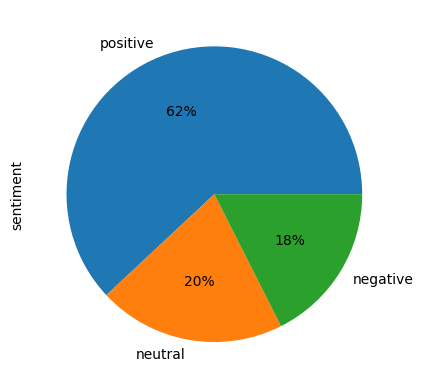

In [ ]:
import matplotlib.pyplot as plt
countClass = pd.value_counts(d["sentiment"], sort=True)
print(countClass)
countClass.plot(kind="pie", autopct='%1.0f%%')
plt.show()

### WordCloud

Positive words


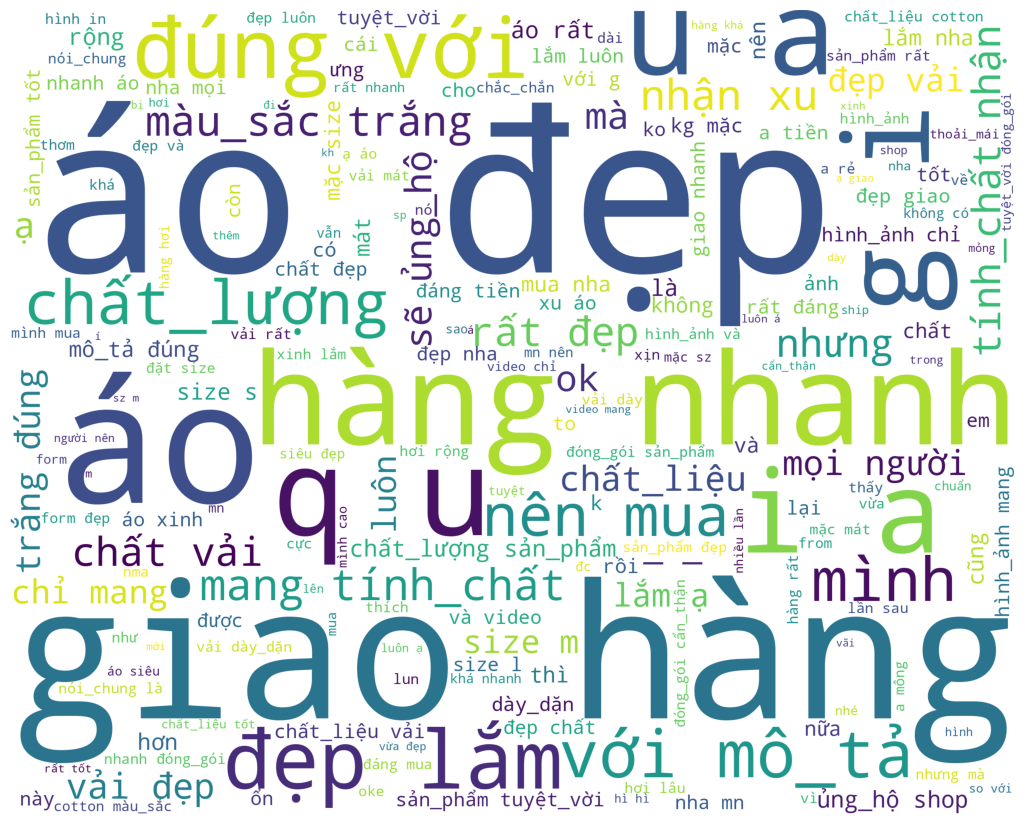

Negative words


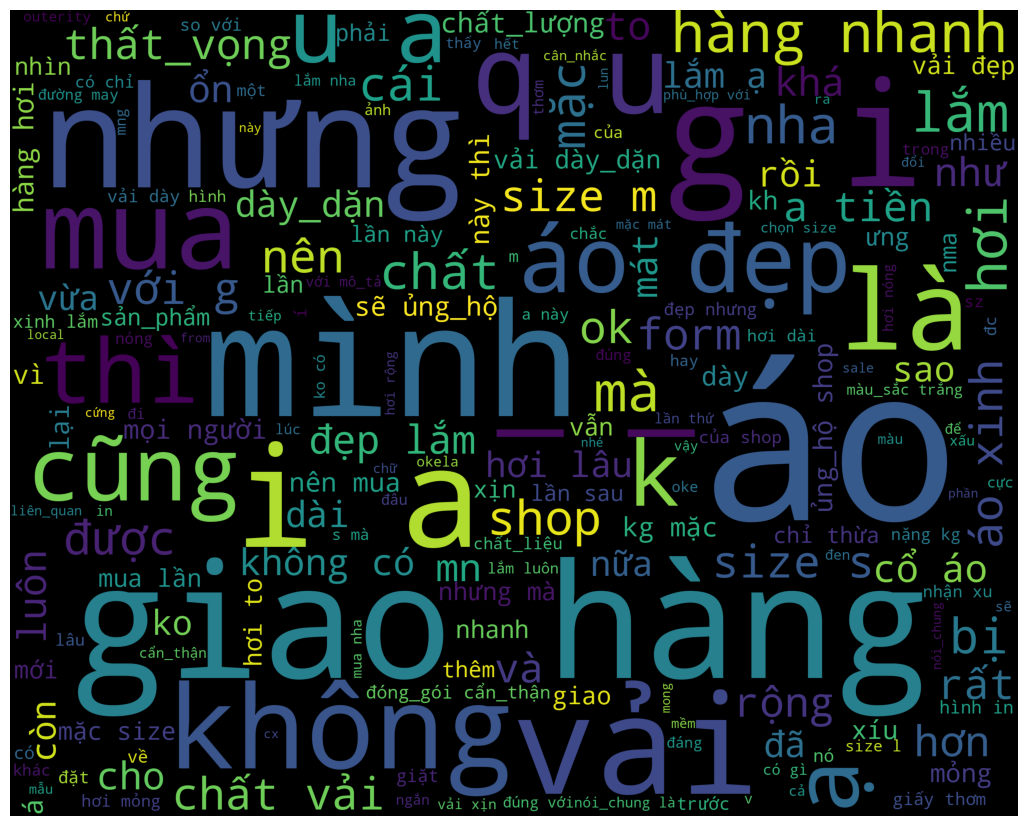

Neutral words


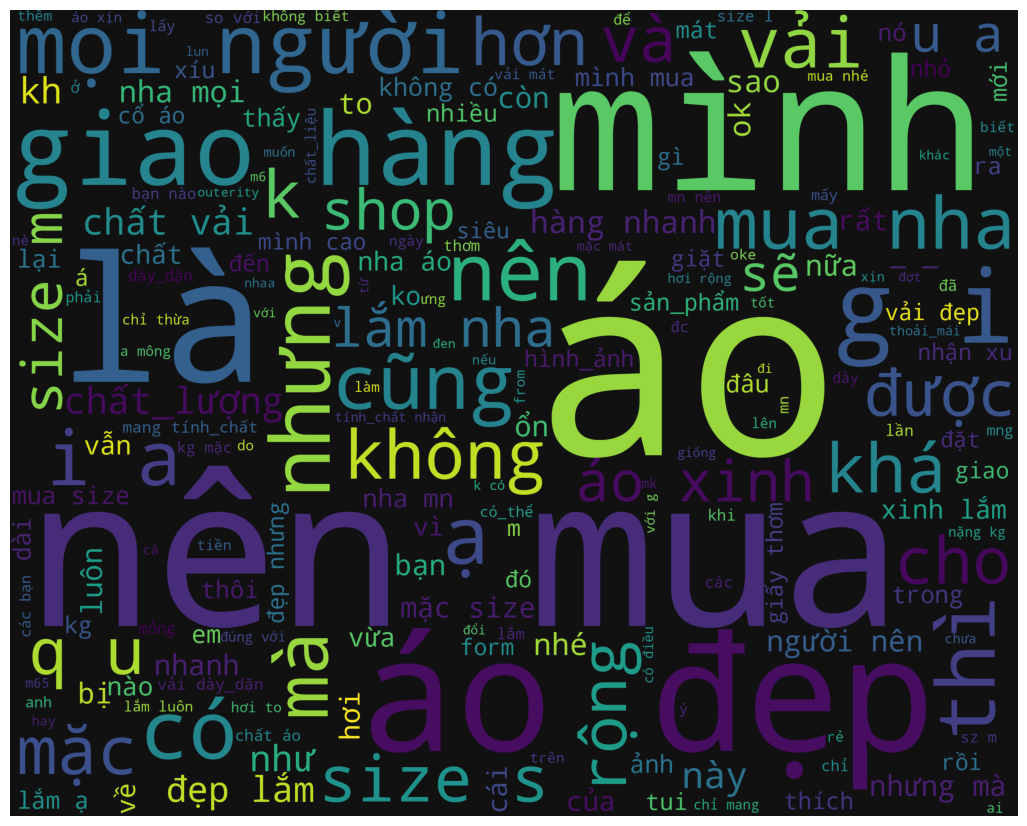

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Splitting the dataset into train and test set
wordcloudData = d[['comment_normalized','sentiment']]
wordcloudData[0:3]
pos = wordcloudData[wordcloudData['sentiment'] == 'positive']
pos = pos['comment_normalized']
neg = wordcloudData[wordcloudData['sentiment'] == 'negative']
neg = neg['comment_normalized']
# neu = wordcloudData[isNaN(wordcloudData['sentiment'])]
neu = wordcloudData[wordcloudData['sentiment'] == 'neutral']
neu = neu['comment_normalized']

vnStopwords = pd.read_csv("/content/drive/MyDrive/PROJECTS/👩‍🎓 Xử lý ngôn ngữ tự nhiên (NAT609010) NLP/bao cao/vietnamese-stopwords.csv")
stopwords=vnStopwords["stopwords"].tolist()

def wordcloud_draw(d, color = 'black'):
  words = ' '.join(d.astype(str))
  cleaned_word = " ".join([word for word in words.split()])
  wordcloud = WordCloud(stopwords=vnStopwords,
    background_color=color,
    width=2500,
    height=2000
  ).generate(cleaned_word)

  plt.figure(1,figsize=(13, 13))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

print("Positive words")
wordcloud_draw(pos,'white')
print("Negative words")
wordcloud_draw(neg, "#000000")
print('Neutral words')
wordcloud_draw(neu,'#111111')

### Save normalized data

In [ ]:
d.to_csv("/content/cleaned_reviews.csv", index=False)

### Load Data

In [ ]:
%pip install pyvi sklearn gensim

In [ ]:
from pyvi import ViTokenizer, ViPosTagger # thư viện NLP tiếng Việt
from tqdm import tqdm
import numpy as np
import gensim # thư viện NLP

In [ ]:
d = pd.read_csv('/content/cleaned_reviews.csv') # Data sau khi xử lý thủ công

def get_data(data):
  X = data["comment_normalized"].values.astype(str)
  y = data["sentiment"].values.astype(str)
  for comment in X:
    comment = gensim.utils.simple_preprocess(comment)
    comment = ' '.join(comment)
    comment = ViTokenizer.tokenize(comment)
    for index,sentiment in enumerate(y):
      if sentiment == "nan":
        y[index] = "neutral"
  return X, y
X_data, y_data = get_data(d)

In [ ]:
X_data

array(['màu_sắc : trắng đúng với mô_tả : đúng chất_liệu : hông bít đỉnk lắm luôn á , chất vải dày_dặn cầm nặng_tay , form đẹp , có tag đầy_đủ vs lại áo nhà outerity hơi to nên mik m64 đặt size m là rộng đúng kiểu mik thích rồi , ns chung ưng cái bụng',
       'chất_liệu : côttn màu_sắc : trắng đúng với mô_tả : đúng áo rất đẹp ._shop rep tn thân_thiện và dethw cực lun í mn mún tư_vấn j cứ ib_shop_shop lúc_nào cx rep tn mn ._shop cb áo hơi lâu chc do dịp tết nên mn đặt nhiều mà áo về form rất ưng mà áo bên shop khá rộng và dài mik m58 48 kg mặc qa mông size m nhe mn lưu_ý khi mua.mn nên mua nhe áo rất đẹp',
       "áo đẹp nên mua nhà ._sjhkiebameuqp .._' ưhwjwidhdswrifboiuq", ...,
       'mình mua chung với ny thấy chất vải khá mịn , mát , dày_dặn , hình in sắc nét , ép nhũ đẹp',
       'đầu năm hoan hỷ ! ! ! hiện_tại hệ_thống chúng_tôi đang trong q u a_trình xử_lý các đơn hàng trong tết và giao đi từ_từ theo thứ_tự từ dưới lên . những q u y kh đã đặt_hàng trước đó vui_lòng nhẹ_nhàng , t

In [ ]:
X_data[0]

'màu_sắc : trắng đúng với mô_tả : đúng chất_liệu : hông bít đỉnk lắm luôn á , chất vải dày_dặn cầm nặng_tay , form đẹp , có tag đầy_đủ vs lại áo nhà outerity hơi to nên mik m64 đặt size m là rộng đúng kiểu mik thích rồi , ns chung ưng cái bụng'

## ML

## Quy trình thực hiện:
- Loại bỏ các quan sát có nhãn None, không có bình luận
- Chuyển dữ liệu bình luận thành các vectơ Tfidf
- Giảm chiều dữ liệu với Truncated SVD với số nhân tố giải thích khoảng 50%
phương sai dữ liệu.
- Chuẩn hóa Minmaxscaler cho dữ liệu đã được giảm chiều để đưa các phần tử của
véc tơ về số không âm, phù hợp với nhiều thuật toán
- Mã hóa nhãn của biến phân loại đánh giá bình luận về dạng số
- Chia tập dữ liệu huấn luyện 80%, kiểm tra 20%
- Huấn luyện với Machine learning. Kiểm tra hiệu năng thông qua độ chính xác.

In [ ]:
%pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import pickle
import time
# Thư viện sklearn (Các thuật toán naive bayes, neural_network)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer # Dùng để tạo ma trận TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split # Chia tập train, test, confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
# Chia tập train/test
test_percent = 0.2
#Chia tập dữ liệu ra train và test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_percent,
random_state=30)

In [ ]:
## Áp dụng Machine Learning
# Neural Network
# from sklearn.neural_network import MLPClassifier
# from mpl_toolkits.mplot3d import Axes3D

#Kích thước dữ liệu train, dữ liệu test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2351,)
(588,)
(2351,)
(588,)


In [ ]:
y_train

array(['positive', 'positive', 'positive', ..., 'neutral', 'neutral',
       'negative'], dtype='<U8')

### TF-IDF

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer='word', max_features=30000)
tfidf_vect.fit(X_train) # learn vocabulary and idf from training set
X_train_tfidf =  tfidf_vect.transform(X_train)
# assume that we don't have test set before
X_test_tfidf =  tfidf_vect.transform(X_test)

In [ ]:
print("n_samples: %d, n_features: %d" % X_test_tfidf.shape)

n_samples: 588, n_features: 4067


In [ ]:
tfidf_matrix = X_test_tfidf.T
# tfidf_matrix.columns = ['response'+ str(i) for i in range(1, 6)]
# tfidf_matrix['count'] = tfidf_matrix.sum(axis=1)

# Top 10 words
# tfidf_matrix = tfidf_matrix.sort_values(by ='count', ascending=False)[:10]

# Print the first 10 words
print(tfidf_matrix)

### Label enccoding


In [ ]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
y_train_n = encoder.fit_transform(y_train)
y_test_n = encoder.fit_transform(y_test)

encoder.classes_

array(['negative', 'neutral', 'positive'], dtype='<U8')

### Model building

In [ ]:
%pip install scikit-plot

import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics

In [ ]:
## In độ chính xác và confusion matrix
def train_model(classifier, X_train, y_train, X_test, y_test, is_neuralnet=False, n_epochs=3):
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

  if is_neuralnet:
    classifier.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=512)
    val_predictions = classifier.predict(X_val)
    test_predictions = classifier.predict(X_test)
    val_predictions = val_predictions.argmax(axis=-1)
    test_predictions = test_predictions.argmax(axis=-1)

    skplt.metrics.plot_confusion_matrix(y_val,val_predictions,text_fontsize="medium",cmap='Greens',figsize=(8,8))
    plt.show()
    print("Train accuracy: ", metrics.accuracy_score(val_predictions, y_val))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))
    print("The classification report for the model : \n\n"+ classification_report(val_predictions,y_val))
  else:
    classifier.fit(X_train, y_train)
    train_predictions = classifier.predict(X_train)
    val_predictions = classifier.predict(X_val)
    test_predictions = classifier.predict(X_test)
    skplt.metrics.plot_confusion_matrix(y_train,train_predictions,text_fontsize="medium",cmap='Greens',figsize=(8,8))
    plt.show()
    print("Train accuracy: ", metrics.accuracy_score(train_predictions, y_train))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))
    print("Validation accuracy: ", metrics.accuracy_score(val_predictions, y_val))
    print("The classification report for the model : \n\n"+ classification_report(val_predictions,y_val))

### Naive Bayes

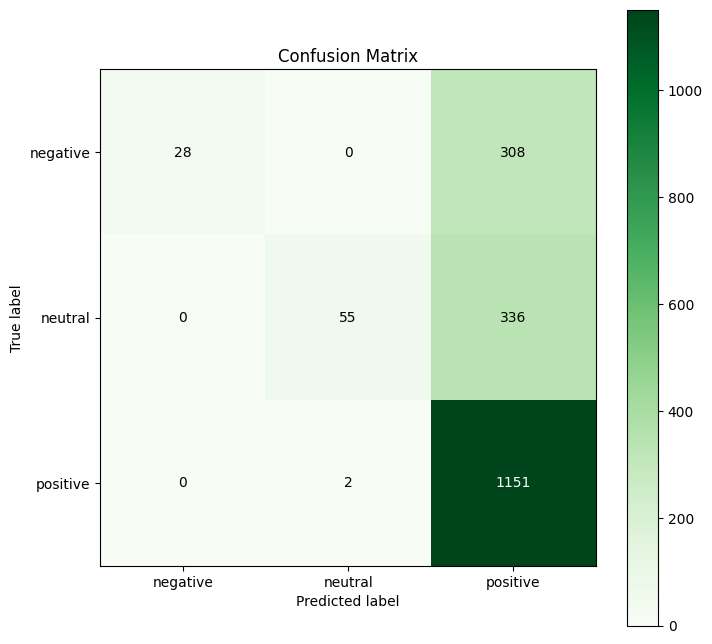

Train accuracy:  0.6563829787234042
Test accuracy:  0.6700680272108843
Validation accuracy:  0.6008492569002123
The classification report for the model : 

              precision    recall  f1-score   support

    negative       0.02      0.40      0.04         5
     neutral       0.05      1.00      0.09         5
    positive       1.00      0.60      0.75       461

    accuracy                           0.60       471
   macro avg       0.36      0.67      0.29       471
weighted avg       0.98      0.60      0.73       471



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

train_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test, is_neuralnet=False)

### K-Nearest Kneighbor

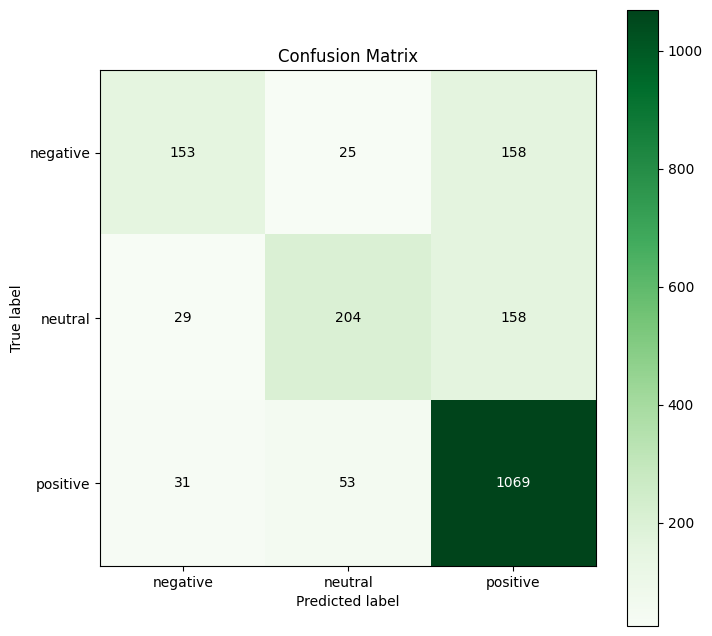

Train accuracy:  0.7585106382978724
Test accuracy:  0.6768707482993197
Validation accuracy:  0.6518046709129511
The classification report for the model : 

              precision    recall  f1-score   support

    negative       0.25      0.43      0.31        51
     neutral       0.39      0.59      0.47        70
    positive       0.88      0.70      0.78       350

    accuracy                           0.65       471
   macro avg       0.51      0.57      0.52       471
weighted avg       0.74      0.65      0.68       471



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_model(KNeighborsClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test, is_neuralnet=False)

### Decision Tree

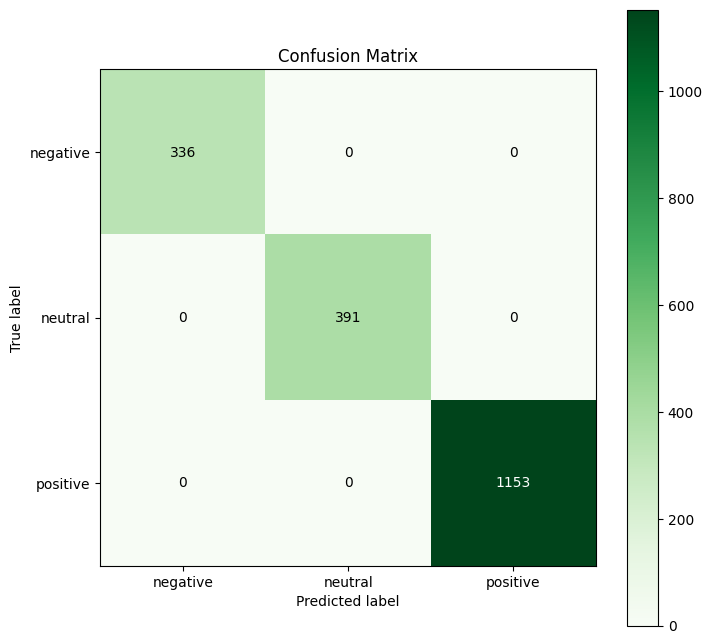

Train accuracy:  1.0
Test accuracy:  0.7193877551020408
Validation accuracy:  0.6963906581740976
The classification report for the model : 

              precision    recall  f1-score   support

    negative       0.51      0.54      0.52        84
     neutral       0.54      0.58      0.56        98
    positive       0.82      0.78      0.80       289

    accuracy                           0.70       471
   macro avg       0.62      0.63      0.63       471
weighted avg       0.70      0.70      0.70       471



In [ ]:
from sklearn.tree import DecisionTreeClassifier

train_model(DecisionTreeClassifier(), X_train_tfidf, y_train, X_test_tfidf, y_test, is_neuralnet=False)

### SVM

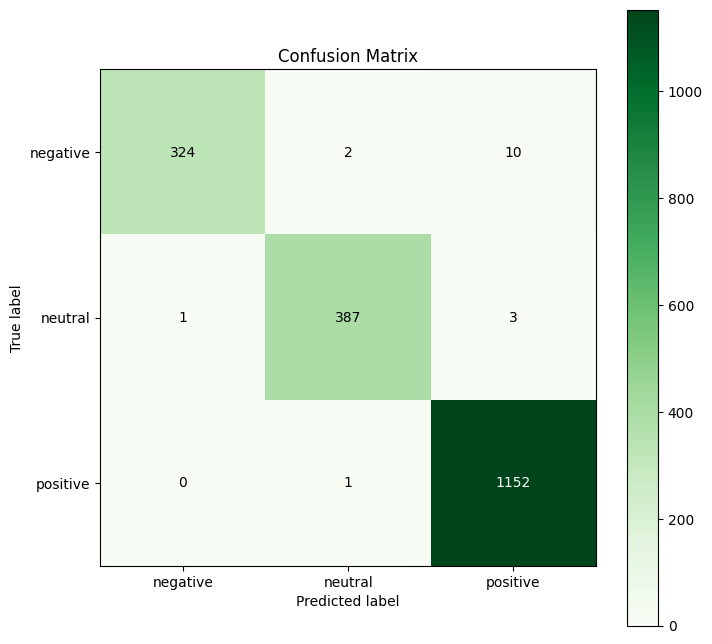

Train accuracy:  0.9909574468085106
Test accuracy:  0.782312925170068
Validation accuracy:  0.7112526539278131
The classification report for the model : 

              precision    recall  f1-score   support

    negative       0.19      0.77      0.31        22
     neutral       0.47      0.77      0.58        64
    positive       0.97      0.70      0.81       385

    accuracy                           0.71       471
   macro avg       0.54      0.75      0.57       471
weighted avg       0.87      0.71      0.76       471



In [ ]:
from sklearn.svm import SVC
train_model(SVC(), X_train_tfidf, y_train, X_test_tfidf, y_test, is_neuralnet=False)

## Word2Vec
===
Nếu mình đã có model để dự đoán word2vec, làm sao dùng nó để dự đoán tiếp được.

In [ ]:
from gensim.models import Word2Vec
mymodel_path = '/content/drive/MyDrive/PROJECTS/👩‍🎓 Xử lý ngôn ngữ tự nhiên (NAT609010) NLP/bao cao//wikiw2v.model'
mymodel = Word2Vec.load(mymodel_path)

In [ ]:
def get_word2vec_data(model, X):
    word2vec_data = []
    for x in X:
      sentence = []
      for word in x.split(" "):
        if word in model.wv:
          sentence.append(model.wv[word])
        word2vec_data.append(sentence)
    return word2vec_data

In [ ]:
X_train_w2v_wiki = get_word2vec_data(mymodel, X_train)
X_test_w2v_wiki = get_word2vec_data(mymodel, X_test)

In [ ]:
len(X_train_w2v_wiki)

50857

In [ ]:
len(X_train_w2v_wiki[0][0])

100

In [ ]:
embeddingsSize = 100
def getVectors(model, dataset):
  singleDataItemEmbedding=np.zeros(embeddingsSize)
  vectors=[]
  for dataItem in dataset:
    wordCount=0
    for word in dataItem:
      if word in model.wv.key_to_index:
        singleDataItemEmbedding= singleDataItemEmbedding + model.wv[word]
        wordCount=wordCount+1

    singleDataItemEmbedding=singleDataItemEmbedding/wordCount
    vectors.append(singleDataItemEmbedding)
  return vectors


In [ ]:
trainReviewVectors=getVectors(mymodel, X_train)
testReviewVectors=getVectors(mymodel, X_test)

<ipython-input-77-2318dcccc3d4>:12: RuntimeWarning: divide by zero encountered in true_divide
  singleDataItemEmbedding=singleDataItemEmbedding/wordCount


In [ ]:
X_data[0]

'màu_sắc : trắng đúng với mô_tả : đúng chất_liệu : hông bít đỉnk lắm luôn á , chất vải dày_dặn cầm nặng_tay , form đẹp , có tag đầy_đủ vs lại áo nhà outerity hơi to nên mik m64 đặt size m là rộng đúng kiểu mik thích rồi , ns chung ưng cái bụng'

In [ ]:
X_data[0].split('\t')

['màu_sắc : trắng đúng với mô_tả : đúng chất_liệu : hông bít đỉnk lắm luôn á , chất vải dày_dặn cầm nặng_tay , form đẹp , có tag đầy_đủ vs lại áo nhà outerity hơi to nên mik m64 đặt size m là rộng đúng kiểu mik thích rồi , ns chung ưng cái bụng']

In [ ]:
import string
def normalize_text(text):
    listpunctuation = string.punctuation.replace('_', '')
    for i in listpunctuation:
        text = text.replace(i, ' ')
        text= re.sub(r'\d+', '', text)
    return text.lower()

In [ ]:
import nltk
from nltk import sent_tokenize
from underthesea import word_tokenize as vword_tokenize

nltk.download('punkt')
moretraindata = []
for i in range(len(X_data)):
  sents=sent_tokenize(X_data[i].split('\t')[0])
  for sent in sents:
    moretraindata.append(vword_tokenize(normalize_text(sent)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# train new data
mymodel.train(X_data,total_examples=len(X_data), epochs=mymodel.epochs)

(832771, 1425745)

In [ ]:
mymodel

In [ ]:
trainReviewVectors=getVectors(mymodel, X_train)
testReviewVectors=getVectors(mymodel, X_test)

<ipython-input-52-2318dcccc3d4>:12: RuntimeWarning: divide by zero encountered in true_divide
  singleDataItemEmbedding=singleDataItemEmbedding/wordCount


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(trainReviewVectors, y_data, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

train_model(MultinomialNB(), trainReviewVectors, y_train, testReviewVectors, y_test, is_neuralnet=False)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: ignored